# Grid notation of permutations

In [1]:
import Permutations as pm

import random
import numpy as np
import sympy
sympy.init_printing()

# import plotly.graph_objects as go

## Functions

In [2]:
def reduce(pm):
    mtx = pm.copy()
    for row in range(len(mtx)-1):
        cols = (np.where(mtx[row]>0)[0][0], np.where(mtx[row+1]>0)[0][0])
        if cols[0]+1 == cols[1]:
            col = cols[0]
            mtx[row][col] += mtx[row+1][col+1]
            mtx = np.delete(mtx,row+1,0)
            mtx = np.delete(mtx,col+1,1)
            break
    return mtx

In [3]:
def get_grid(pm):
    mtx = pm.copy()
    prev_size = len(mtx)
    while True:
        mtx = reduce(mtx)
        if len(mtx) < prev_size:
            prev_size = len(mtx)
        else: break
    return mtx

In [4]:
def show(grid):
    hline, vline = "+---"*len(grid)+"+", "|   "*len(grid)+"|" 
    for row in grid:
        idx = np.where(row>0)[0][0]
        print(hline+"\n"+ \
              vline[:4*idx+2]+"{}".format(row[idx])+vline[4*(idx+1)-1:])
    else:
        print(hline)

In [5]:
def transform(grid):
    gd = grid.copy()
    if gd[0][0] > 0:
        num = gd[0][0]
        gd = np.delete(gd,0,0)
        gd = np.delete(gd,0,1)
        # print("Decompose into {} + the remaining grid".format(num))
        gd = {'num': num, 'grid': gd}
    else:
        a_col = np.where(gd[0]>0)[0][0]
        a = gd[0][a_col]
        fc = np.array([r[0] for r in gd])
        b_row = np.where(fc>0)[0][0]
        b = fc[b_row]
        if a > b:
            gd[0][a_col] = a-b
            gd = np.insert(gd,a_col,fc,1)
            gd = np.delete(gd,0,1)
        elif a < b:
            gd[b_row][0] = b-a
            gd = np.insert(gd,b_row,gd[0],0)
            gd = np.delete(gd,0,0)
        else: # a == b
            gd[b_row][a_col] = a
            gd = np.delete(gd,0,0)
            gd = np.delete(gd,0,1)
    return gd

# Sequence of reduction

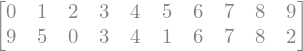

[[9, 2, 0], [5, 1], [3], [4], [6], [7], [8]], 7
+---+---+---+---+---+---+---+
|   |   | 1 |   |   |   |   |
+---+---+---+---+---+---+---+
|   |   |   |   | 1 |   |   |
+---+---+---+---+---+---+---+
|   |   |   |   |   |   | 1 |
+---+---+---+---+---+---+---+
|   |   |   | 2 |   |   |   |
+---+---+---+---+---+---+---+
|   | 1 |   |   |   |   |   |
+---+---+---+---+---+---+---+
|   |   |   |   |   | 3 |   |
+---+---+---+---+---+---+---+
| 1 |   |   |   |   |   |   |
+---+---+---+---+---+---+---+


In [6]:
N = 10
img = list(range(N)); random.shuffle(img)

prm = pm.Permutation(img); display(sympy.Matrix(prm.two_line())) #, prm.image, prm.size)
cd = pm.cycle_decomp(prm); print("{}, {}".format(cd, len(cd)))
G = get_grid(prm.matrix());

show(G)

In [7]:
grid = G.copy()
nums = []

while len(grid) > 1:
    new = transform(grid)
    if type(new) == dict:
        nums += [new['num']]
        grid = get_grid(new['grid'])
    else:
        # ----------
        # from IPython.core.debugger import Pdb; Pdb().set_trace()
        # ----------
        grid = get_grid(new)
    show(grid)
    print("\n↓ {}\n".format(nums)) if len(grid) > 1 else "END"
else:
    nums += [grid[0][0]]
    print("list:{}, total:{}".format(nums, sum(nums)))

+---+---+---+---+---+---+
|   |   |   | 1 |   |   |
+---+---+---+---+---+---+
|   |   |   |   |   | 1 |
+---+---+---+---+---+---+
|   |   | 2 |   |   |   |
+---+---+---+---+---+---+
| 1 |   |   |   |   |   |
+---+---+---+---+---+---+
|   |   |   |   | 3 |   |
+---+---+---+---+---+---+
|   | 1 |   |   |   |   |
+---+---+---+---+---+---+

↓ []

+---+---+---+
|   |   | 1 |
+---+---+---+
|   | 6 |   |
+---+---+---+
| 1 |   |   |
+---+---+---+

↓ []

+---+
| 7 |
+---+
list:[7], total:7


## Scratch

In [148]:
reduce(np.array([[1,0],[0,2]]))

array([[2]])

In [150]:
print(range(1))

range(0, 1)
